In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Life Expectancy Data.csv")
df = df.drop(columns = ['Status','Country'])
df = df.dropna()
df
     

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


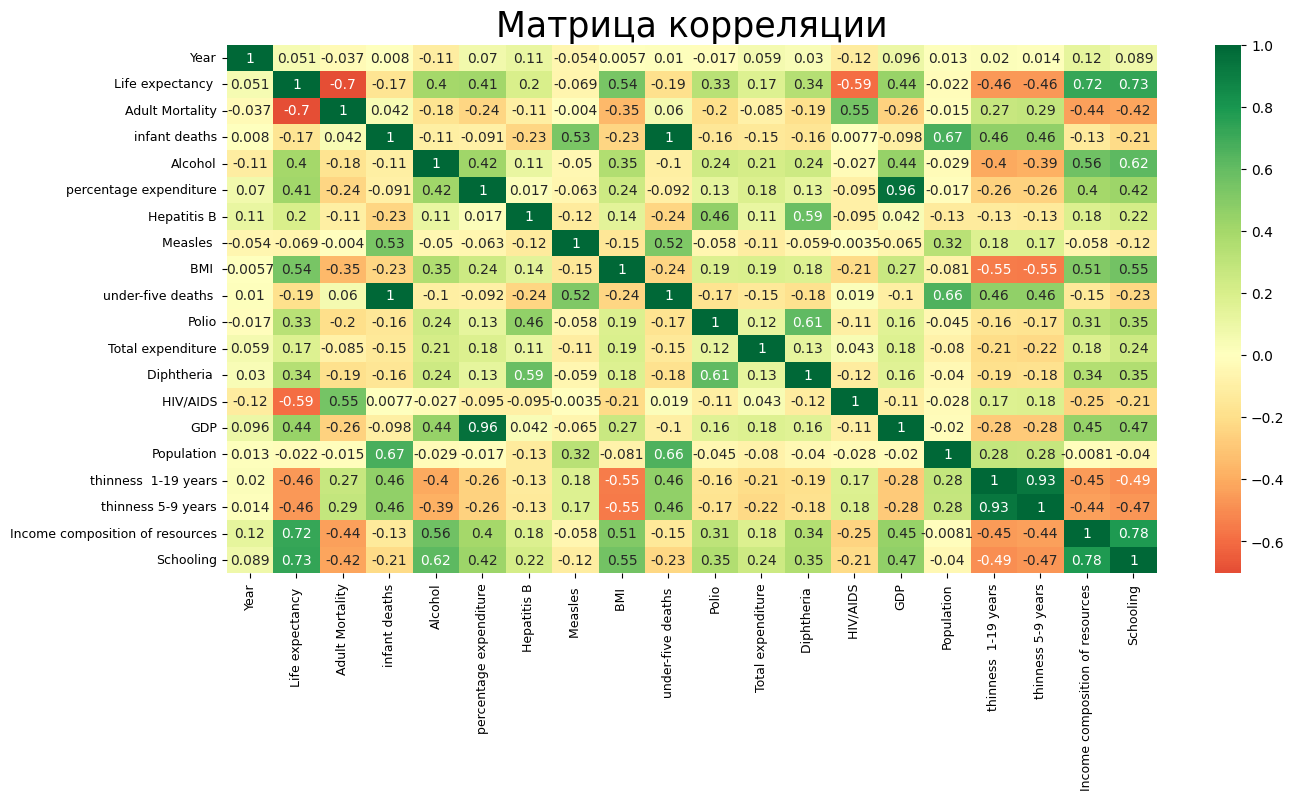

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()
plt.figure(figsize=(15,7), dpi= 100)
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, cmap = 'RdYlGn', center = 0, annot = True)

plt.title('Матрица корреляции', fontsize=25)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [89]:
import numpy as np
columns_name = df.columns.tolist()

X = df[['Adult Mortality',' BMI ',' HIV/AIDS','Income composition of resources','Schooling']]
X


,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,263.0,19.1,0.1,0.479,10.1
1,271.0,18.6,0.1,0.476,10.0
2,268.0,18.1,0.1,0.470,9.9
3,272.0,17.6,0.1,0.463,9.8
4,275.0,17.2,0.1,0.454,9.5
...,...,...,...,...,...
2933,723.0,27.1,33.6,0.407,9.2
2934,715.0,26.7,36.7,0.418,9.5
2935,73.0,26.3,39.8,0.427,10.0
2936,686.0,25.9,42.1,0.427,9.8


In [90]:
y = df['Life expectancy ']
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 1649, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (1154, 5), (1154,)
Test dataset size: (495, 5), (495,)


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
#Свободный коэффицент уравнения w0:
w0 = model.intercept_
w0

52.24943749441539

In [94]:
#Веса всех признаков (w1):
w1 = model.coef_
w1

array([-0.01817054,  0.03609863, -0.43589985, 12.62334093,  0.95877756])

In [95]:
print("Y =", model.intercept_, end='')
w = model.coef_
for i in range(w.shape[0]):
  print(' +', w[i], X.columns[i], end = ' ')

Y = 52.24943749441539 + -0.018170537677676565 Adult Mortality  + 0.03609863318754014  BMI   + -0.43589984701243684  HIV/AIDS  + 12.623340931892956 Income composition of resources  + 0.9587775598525781 Schooling 

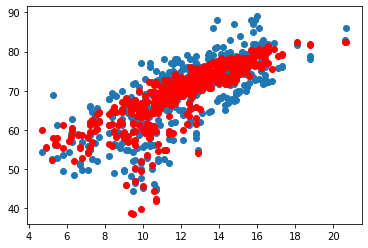

In [96]:
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(X_test['Schooling'], y_test)
plt.scatter(X_test['Schooling'], y_pred, color = 'red', linewidth = 1);
plt.show()
     

In [97]:
#среднеквадратичное отклонение
l = (y_test - y_pred)**2
MSE_vruch = sum(l)/len(l)
MSE_vruch

14.447065303178551

In [98]:
#абсолютное отклонение
k = abs(y_test - y_pred)
MAE_vruch = sum(k)/len(k)
MAE_vruch

2.8849001325198933

In [100]:
#Метрики при обучении на признаках у которых коэф корреляции с target > 0.5
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
     

Mean Absolute Error: 2.884900132519899
Mean Squared Error: 14.447065303178547
R2 score: 0.8109090698733004


In [104]:
#Старые метрики (обучение на всех признаках)
#Mean Absolute Error: 2.657948570832772
#Mean Squared Error: 12.449983894628069
#R2 score: 0.8342725505194604
#Старые и новые метрики практически не отличаются но новые чуть-чуть хуже

In [102]:
#Вывод: разработанная модель работает довольно хорошо (так как R2 = 0.83, что близко к 1 , а также MSE = 12.4 и MAE = 2.7 , что близко к 0)